In [256]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt



mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


from sklearn.tree import DecisionTreeClassifier,plot_tree

In [257]:
df=pd.read_csv('https://drive.google.com/uc?id=1-IPjL7WS4lXgYWL7mnmykZ_Z_rvKcolL', header=0)
# download data from https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link

https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link

In [258]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [259]:
df = df.drop(columns = ['index', 'Patient Id'])
#df['Level'] = df['Level'].replace({'Low': 0, 'Medium': 1, 'High': 2}).astype(float)




In [260]:
#data. tail(-1) 
print(df.iloc[2, 21])

7


In [261]:
X = df.iloc[:, :-1]  # All features except the 25th
y = df.iloc[:, -1] 

In [262]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=3)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=3)

[Text(0.5555555555555556, 0.875, 'Coughing of Blood <= 5.5\ngini = 0.665\nsamples = 1000\nvalue = [365, 303, 332]\nclass = High'),
 Text(0.3333333333333333, 0.625, 'Wheezing <= 4.5\ngini = 0.517\nsamples = 585\nvalue = [10.0, 283.0, 292.0]\nclass = Medium'),
 Text(0.2222222222222222, 0.375, 'Snoring <= 4.5\ngini = 0.357\nsamples = 364\nvalue = [10, 283, 71]\nclass = Low'),
 Text(0.1111111111111111, 0.125, 'gini = 0.177\nsamples = 313\nvalue = [10, 283, 20]\nclass = Low'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 51\nvalue = [0, 0, 51]\nclass = Medium'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 221\nvalue = [0, 0, 221]\nclass = Medium'),
 Text(0.7777777777777778, 0.625, 'OccuPational Hazards <= 7.5\ngini = 0.257\nsamples = 415\nvalue = [355, 20, 40]\nclass = High'),
 Text(0.6666666666666666, 0.375, 'Obesity <= 2.5\ngini = 0.146\nsamples = 385\nvalue = [355, 20, 10]\nclass = High'),
 Text(0.5555555555555556, 0.125, 'gini = 0.0\nsamples = 20\nvalue = [0, 20, 

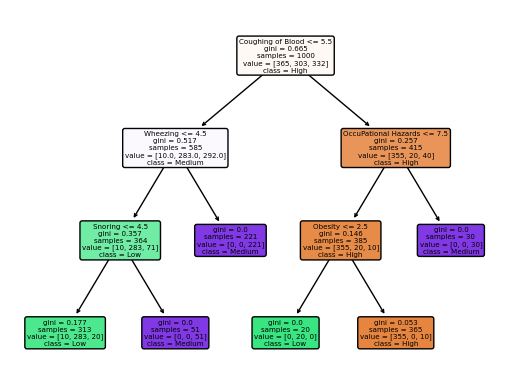

In [263]:
plot_tree(tree_clf);
plot_tree(tree_clf, feature_names=X.columns, class_names=tree_clf.classes_, filled=True, rounded=True)

In [264]:
tree_clf_D10 = DecisionTreeClassifier(max_depth=10, random_state=20)
tree_clf_D10.fit(X, y)

DecisionTreeClassifier(max_depth=10, random_state=20)

[Text(0.6, 0.9166666666666666, 'Coughing of Blood <= 5.5\ngini = 0.665\nsamples = 1000\nvalue = [365, 303, 332]\nclass = High'),
 Text(0.4, 0.75, 'Wheezing <= 4.5\ngini = 0.517\nsamples = 585\nvalue = [10.0, 283.0, 292.0]\nclass = Medium'),
 Text(0.3, 0.5833333333333334, 'Snoring <= 4.5\ngini = 0.357\nsamples = 364\nvalue = [10, 283, 71]\nclass = Low'),
 Text(0.2, 0.4166666666666667, 'Obesity <= 4.5\ngini = 0.177\nsamples = 313\nvalue = [10, 283, 20]\nclass = Low'),
 Text(0.1, 0.25, 'gini = 0.0\nsamples = 283\nvalue = [0, 283, 0]\nclass = Low'),
 Text(0.3, 0.25, 'OccuPational Hazards <= 5.5\ngini = 0.444\nsamples = 30\nvalue = [10, 0, 20]\nclass = Medium'),
 Text(0.2, 0.08333333333333333, 'gini = 0.0\nsamples = 20\nvalue = [0, 0, 20]\nclass = Medium'),
 Text(0.4, 0.08333333333333333, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0]\nclass = High'),
 Text(0.4, 0.4166666666666667, 'gini = 0.0\nsamples = 51\nvalue = [0, 0, 51]\nclass = Medium'),
 Text(0.5, 0.5833333333333334, 'gini = 0.0\nsa

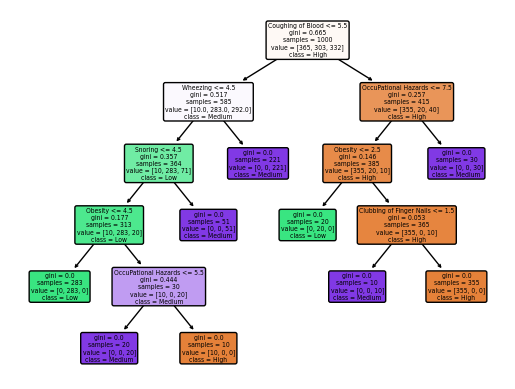

In [265]:
plot_tree(tree_clf_D10);
plot_tree(tree_clf_D10, feature_names=X.columns, class_names=tree_clf_D10.classes_, filled=True, rounded=True)